In [1]:
import json
import os

data = []

# Accumulating all files into one
base_path = '/kaggle/input/abo-listings/listings/metadata'
for suffix in range(16):
    filename = f'listings_{hex(suffix)[2:]}.json'
    filepath = os.path.join(base_path, filename)
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            if line.strip():  # avoid blank lines
                data.append(json.loads(line))

In [2]:
import pandas as pd

# Dataframe for the accumulated metadata
extracted = []
for product in data:
    extracted.append({
        "product_type": next((c["value"] for c in product.get("product_type", [])), None),
        "main_image_id": product.get("main_image_id"),
        "other_image_id": ', '.join(product.get("other_image_id", []))
    })

df = pd.DataFrame(extracted)
df

,product_type,main_image_id,other_image_id
0,SHOES,81iZlv3bjpL,"91mIRxgziUL, 91eqBkW06wL, A1BHZSKNbkL"
1,HARDWARE,619y9YG9cnL,"51Fqps5k9YL, 51lCKFuYuWL"
2,MECHANICAL_COMPONENTS,81NP7qh2L6L,"81A0u5L4VAL, 61xhS6iLrZL"
3,SOFA,61Rp4qOih9L,
4,SHOES,714CmIfKIYL,"71C4hQAAs2L, 718uEco1DAL, 71BMHcaG5GL, 7105JsM..."
...,...,...,...
147697,KITCHEN,81kGQ8Ee4GL,"61KK9iFayRL, 81ZYLcDq73L, 817zeFMNUoL, 71yZNXA..."
147698,CELLULAR_PHONE_CASE,71nav9ipOvL,"51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL"
147699,GROCERY,81p6d30KuXL,"61D30IYy5SL, 61LmfMnHhEL, 31bVipuH8DL, 813NWGn..."
147700,HOME_FURNITURE_AND_DECOR,A1ae0BZpo3L,"81PfG9IAnKL, A1cI56l34lL, 91ajo7z2NHL, A1rHn5A..."


In [3]:
#Dropping nan and duplicates
df = df.dropna()
df = df.drop_duplicates()

In [4]:
base_dir = '/kaggle/input/abo-small/images/small'

In [5]:
#Checking for duplicates only on main_image_id
df[df.duplicated(subset='main_image_id')]

,product_type,main_image_id,other_image_id
192,VACUUM_CLEANER,61OnkGVhMWL,
370,AUTO_ACCESSORY,61OnkGVhMWL,
893,TEACHING_EQUIPMENT,61w4fs2ESyL,
953,LIGHT_FIXTURE,61w4fs2ESyL,
968,HOME,61OnkGVhMWL,
...,...,...,...
147648,OFFICE_PRODUCTS,610BO+zcWML,"518JzfyhswL, 51biufSIrML, 51aCYaBEZ8L, 51VWzEu..."
147660,ACCESSORY,81Uwjal+iQL,
147683,SHOES,71RNyOBIK1L,"8112gdUomsL, 81oL1AABMzL, 81IWuDOBlmL, 81eBg9l..."
147690,HOME,A1c92MiAQJL,"A1N5Aio25yL, A11Ecoc0hYL, A1ub7T0t5FL"


In [6]:
# Metadata of abo-small
metadata = pd.read_csv('/kaggle/input/abo-small/images/metadata/images.csv')
metadata

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg
...,...,...,...,...
398207,B1zv8OpTkBS,2560,2560,6d/6d49d130.jpg
398208,B1zwflWhPIS,2560,2560,b1/b163e0ea.jpg
398209,C1lf45DhhRS,2560,2560,a1/a116d9d1.jpg
398210,C1pEt6jBLiS,2560,2560,9c/9c3e1158.jpg


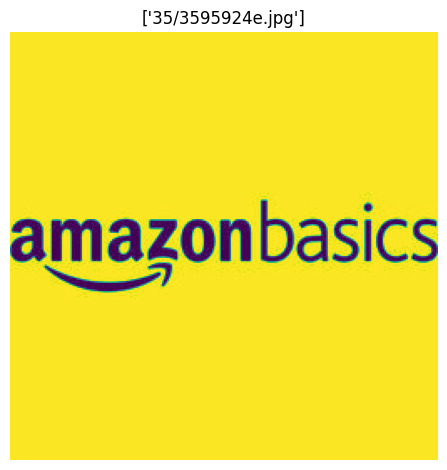

In [7]:
# Plotting entry 192 and 368 (same)
import matplotlib.pyplot as plt
from PIL import Image
import os

img_id = df.loc[192,'main_image_id']
img_path = list(metadata[metadata['image_id']==img_id]['path'].values)
open_path = os.path.join(base_dir,img_path[0])
img = Image.open(open_path)
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.title(img_path)

plt.tight_layout()
plt.show()

In [8]:
l1 = [df.loc[0,'main_image_id']]
l2 = df.loc[0,'other_image_id'].split(', ')
l = l1 + l2
l

['81iZlv3bjpL', '91mIRxgziUL', '91eqBkW06wL', 'A1BHZSKNbkL']

In [9]:
# Finding image paths for l 
img_paths = list(metadata[metadata['image_id'].isin(l)]['path'].values)
img_paths

['8c/8ccb5859.jpg', '30/3062eff1.jpg', '13/13741743.jpg', '8c/8cf58314.jpg']

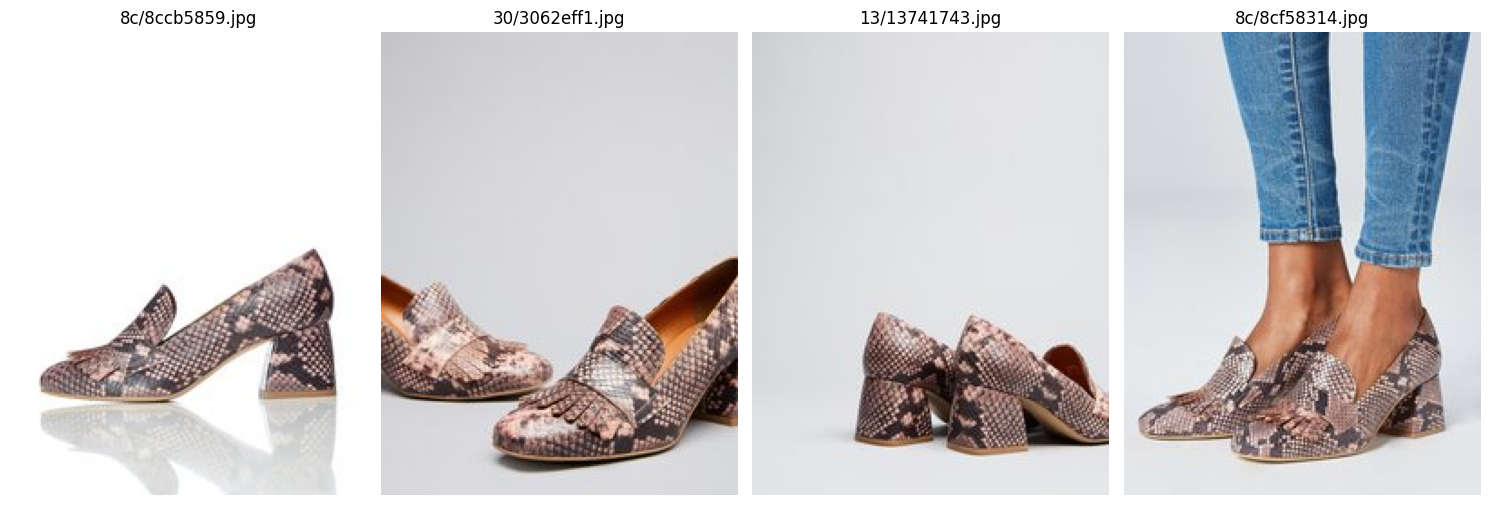

In [10]:
# Plotting all images
import matplotlib.pyplot as plt
from PIL import Image
import os

# Create a figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Loop through each image and its corresponding axis
for ax, img_path in zip(axes, img_paths):
    open_path = os.path.join(base_dir,img_path)
    img = Image.open(open_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axis
    ax.set_title(img_path)

plt.tight_layout()
plt.show()

In [11]:
# Unique Categories
len(df['product_type'].unique())

573

In [12]:
# Checking if main_image_id has entries from other_image_id and removing them
all_ids = []

for ids in df['other_image_id']:
    if isinstance(ids, str):
        all_ids.extend([i.strip() for i in ids.split(',') if i.strip()])

In [13]:
df = df[~df['main_image_id'].isin(all_ids)]
df

,product_type,main_image_id,other_image_id
0,SHOES,81iZlv3bjpL,"91mIRxgziUL, 91eqBkW06wL, A1BHZSKNbkL"
1,HARDWARE,619y9YG9cnL,"51Fqps5k9YL, 51lCKFuYuWL"
2,MECHANICAL_COMPONENTS,81NP7qh2L6L,"81A0u5L4VAL, 61xhS6iLrZL"
3,SOFA,61Rp4qOih9L,
4,SHOES,714CmIfKIYL,"71C4hQAAs2L, 718uEco1DAL, 71BMHcaG5GL, 7105JsM..."
...,...,...,...
147696,CELLULAR_PHONE_CASE,71Is9RZtGNL,"51wiRu6gT9L, 51DEYNWtfsL, 518RypAtk8L, 71Qvf0T..."
147697,KITCHEN,81kGQ8Ee4GL,"61KK9iFayRL, 81ZYLcDq73L, 817zeFMNUoL, 71yZNXA..."
147698,CELLULAR_PHONE_CASE,71nav9ipOvL,"51AbYbblgmL, 51PN64bqb9L, 51kP9HdPKhL"
147699,GROCERY,81p6d30KuXL,"61D30IYy5SL, 61LmfMnHhEL, 31bVipuH8DL, 813NWGn..."


In [14]:
# Value counts of Categories
df['product_type'].value_counts()

product_type
CELLULAR_PHONE_CASE      64464
SHOES                     6354
GROCERY                   5863
HOME                      3832
HOME_BED_AND_BATH         2048
                         ...  
THICKENING_AGENT             1
CAR_AUDIO_OR_THEATER         1
WAIST_CINCHER                1
KICK_SCOOTER                 1
WIRELESS_LOCKED_PHONE        1
Name: count, Length: 573, dtype: int64

In [15]:
# Merging the two metadata and updating path name
metadata = metadata.rename(columns={'image_id':'main_image_id'})
df = pd.merge(df,metadata,how='left').drop(columns=['height','width','other_image_id'])
df['path'] = df['path'].apply(lambda x: os.path.join(base_dir, str(x)))

In [16]:
df = df.drop_duplicates()

### Random Oversampling - Duplicating the data to balance class weights

In [17]:
NUM_IMAGES_IN_DATASET = 25000
NUM_CATEGORIES = len(df['product_type'].unique())
NUM_IMAGES_PER_CATEGORY = NUM_IMAGES_IN_DATASET // NUM_CATEGORIES

In [18]:
# Grouping as per product_type
df_oversampled = df.groupby('product_type', group_keys=False).apply(lambda x: x.sample(n=NUM_IMAGES_PER_CATEGORY,
                                                                                   random_state=42,replace=True))
df_oversampled

/tmp/ipykernel_13/3325766680.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_oversampled = df.groupby('product_type', group_keys=False).apply(lambda x: x.sample(n=NUM_IMAGES_PER_CATEGORY,


,product_type,main_image_id,path
115518,ABIS_BEAUTY,51ZeF0KGa7L,/kaggle/input/abo-small/images/small/2e/2ea83d...
89717,ABIS_BEAUTY,41IXCKCgD7L,/kaggle/input/abo-small/images/small/19/199fdd...
42132,ABIS_BEAUTY,51LQNnuvDTL,/kaggle/input/abo-small/images/small/b0/b0b15a...
126420,ABIS_BEAUTY,61LVc++Fn9L,/kaggle/input/abo-small/images/small/cf/cf3f56...
32582,ABIS_BEAUTY,51k6v4fAISL,/kaggle/input/abo-small/images/small/c0/c00efa...
...,...,...,...
52548,WRITING_PAPER,61HCdcU+ulL,/kaggle/input/abo-small/images/small/a3/a3ec7a...
52548,WRITING_PAPER,61HCdcU+ulL,/kaggle/input/abo-small/images/small/a3/a3ec7a...
52548,WRITING_PAPER,61HCdcU+ulL,/kaggle/input/abo-small/images/small/a3/a3ec7a...
52548,WRITING_PAPER,61HCdcU+ulL,/kaggle/input/abo-small/images/small/a3/a3ec7a...


In [19]:
oversampled_paths = df_oversampled['path']
oversampled_paths.to_csv('/kaggle/working/oversampled_paths.csv', index=False, header=True)

### Sampling - Selecting classes with less frequency (Iterative idea)

In [20]:
import copy
df1=df.copy(deep=True)
df1=df1.drop_duplicates(subset='main_image_id')

In [21]:
import pandas as pd  
import numpy as np  

def custom_sample(df, n=25000, random_state=42):  
    sampled_df = pd.DataFrame()  
    remaining_df = df.copy()  

    while n > 0:
        cat_counts = remaining_df['product_type'].value_counts()  
        C = remaining_df['product_type'].nunique()
        I = n // C if C > 0 else 0                 # no of images per category

        # sample out I entries per category if their frequency greater than I 
        # else select all entries of that category
        current_sample = (  
            remaining_df.groupby('product_type')  
            .apply(lambda x: x.sample(min(I, len(x)), random_state=random_state))  
            .reset_index(drop=True)  
        )

        # if there's nothing sampled, break  
        if current_sample.empty:  
            break  

        # add to final sample set  
        sampled_df = pd.concat([sampled_df, current_sample], ignore_index=True)  

        # changed remaining DataFrame by removing sampled items  
        sampled_image_ids = current_sample['main_image_id'].unique()  
        remaining_df = remaining_df[~remaining_df['main_image_id'].isin(sampled_image_ids)]  

        n -= len(current_sample)  

    return sampled_df  

In [22]:
sampled_df=custom_sample(df1)

/tmp/ipykernel_13/2466696330.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(I, len(x)), random_state=random_state))
/tmp/ipykernel_13/2466696330.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min(I, len(x)), random_state=random_state))
/tmp/ipykernel_13/2466696330.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping co

In [23]:
sampled_df

,product_type,main_image_id,path
0,ABIS_BEAUTY,61T85IKG0jL,/kaggle/input/abo-small/images/small/35/35aeaf...
1,ABIS_BEAUTY,615zng1OXQL,/kaggle/input/abo-small/images/small/5b/5b146f...
2,ABIS_BEAUTY,61GWxkUrmxL,/kaggle/input/abo-small/images/small/b4/b4b24d...
3,ABIS_BEAUTY,51skBBN-CzL,/kaggle/input/abo-small/images/small/71/71c626...
4,ABIS_BEAUTY,61dQs16puUL,/kaggle/input/abo-small/images/small/c7/c70482...
...,...,...,...
24953,WIRELESS_ACCESSORY,51oKprymykL,/kaggle/input/abo-small/images/small/b6/b6a657...
24954,WIRELESS_ACCESSORY,51ghqG5vmQL,/kaggle/input/abo-small/images/small/7a/7abd01...
24955,WIRELESS_ACCESSORY,61Ix3UB8s6L,/kaggle/input/abo-small/images/small/66/6606a2...
24956,WIRELESS_ACCESSORY,71oy3UbI5RL,/kaggle/input/abo-small/images/small/5d/5d29cf...


In [24]:
sampled_df['product_type'].value_counts()

product_type
LIGHT_BULB              184
BACKPACK                184
BOOT                    184
PILLOW                  184
FOOD_SERVICE_SUPPLY     184
                       ... 
GARLIC_PRESS              1
GAME_DICE                 1
CAR_AUDIO_OR_THEATER      1
FOOD_DEHYDRATOR           1
WRITING_PAPER             1
Name: count, Length: 566, dtype: int64

In [25]:
sampled_paths = sampled_df['path']
sampled_paths.to_csv('/kaggle/working/sampled_paths.csv', index=False, header=True)